In [2]:
print("SELMAT 2024")

SELMAT 2024

In [6]:
x = 6

if x % 2 == 0
    println(x," é par!")
else
    println("$x é ímpar!")
end

6 é par!


In [9]:
i = 1

while i < 5
    println(i)
    i += 1
end

1
2
3
4


In [11]:
for i = 1:3
    print(i)
end

123

In [15]:
v = 5:0.5:10
collect(v)

11-element Vector{Float64}:
  5.0
  5.5
  6.0
  6.5
  7.0
  7.5
  8.0
  8.5
  9.0
  9.5
 10.0

In [17]:
for i in v
    println(i)
end

5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5
10.0


In [18]:
sum(v)

82.5

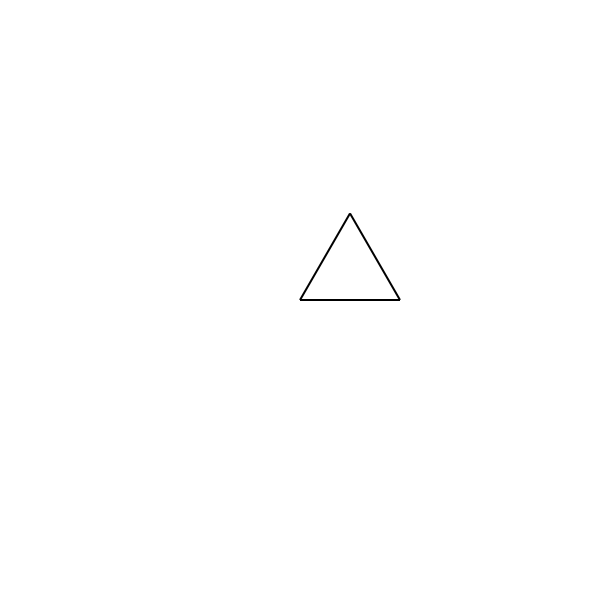

In [26]:
using Luxor

@draw begin
    α = Turtle()
    Forward(α,100)
    Turn(α,-120)
    Forward(α,100)
    Turn(α,-120)
    Forward(α,100)
end

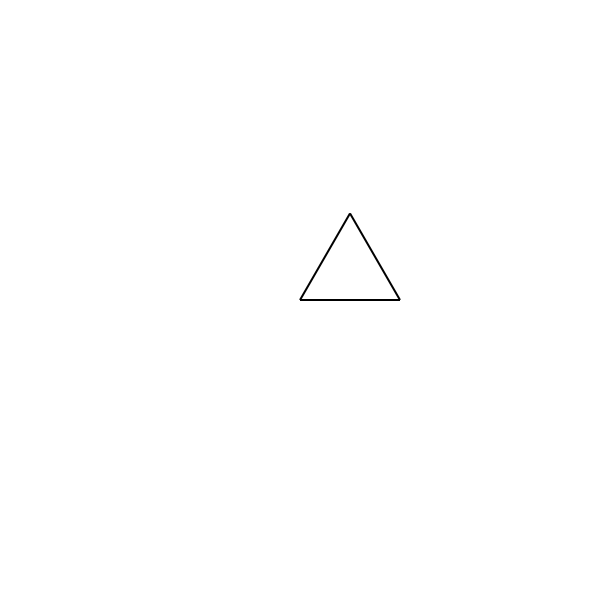

In [27]:
@draw begin
    α = Turtle()
    Forward(α,100)
    for i = 1:2
        Turn(α,-120)
        Forward(α,100)
    end
end

In [38]:
function regular(lados)
    @draw begin
        α = Turtle()
        Forward(α,100)
        for i = 1:(lados - 1)
            Turn(α,-360/lados)
            Forward(α,100)
        end
    end
end

regular (generic function with 1 method)

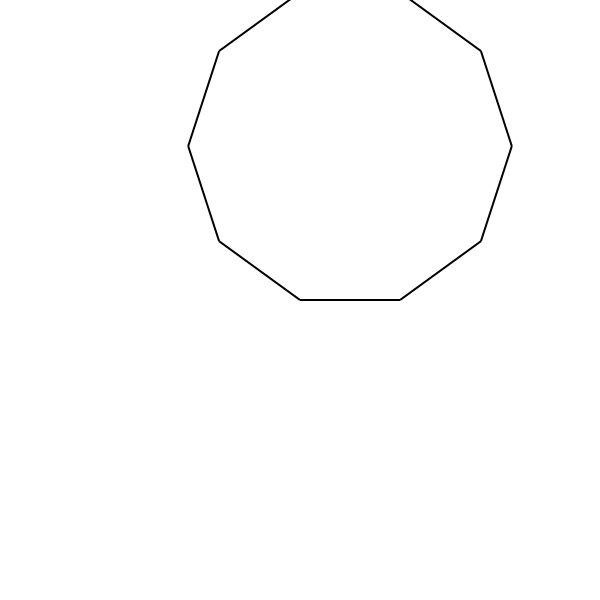

In [40]:
regular(10)

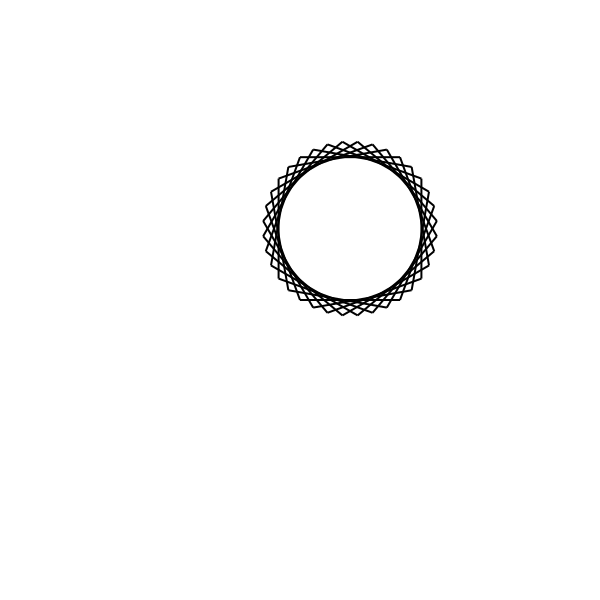

In [54]:
lados = 36

@draw begin
    α = Turtle()
    Forward(α,100)
    for i = 1:(lados -1)
        Turn(α,-70)
        Forward(α,100)
    end
end

In [59]:
f(x)=2cos(x)-1
g(x,y)=x^2+y^2

g (generic function with 2 methods)

In [60]:
g(2,3)

13

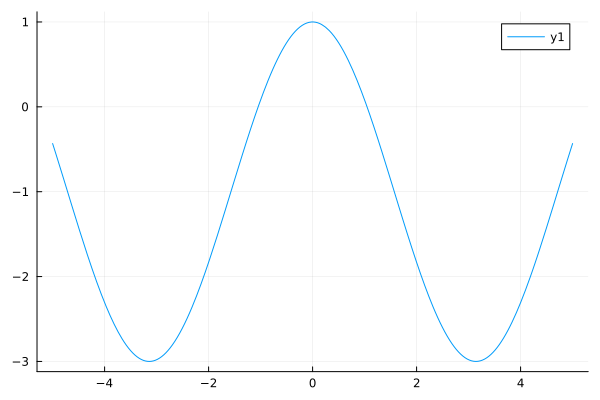

In [61]:
using Plots
plot(f)

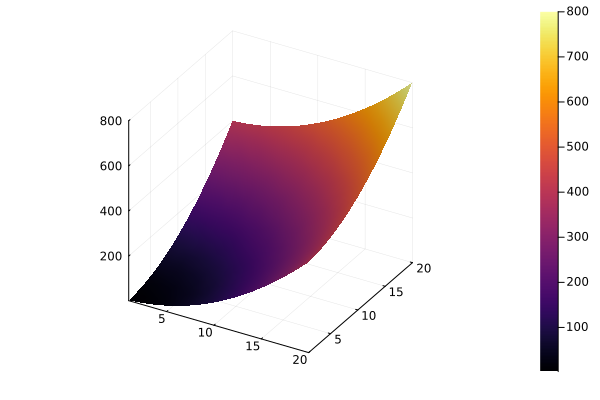

In [62]:
surface(1:20,1:20,g)

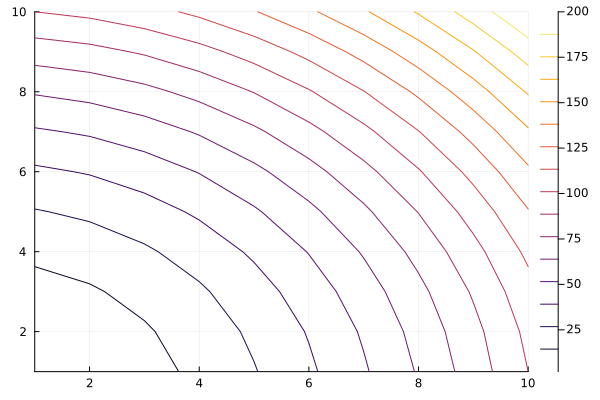

In [65]:
contour(1:10,1:10,g)

$f(x)=2cos(x)-1$

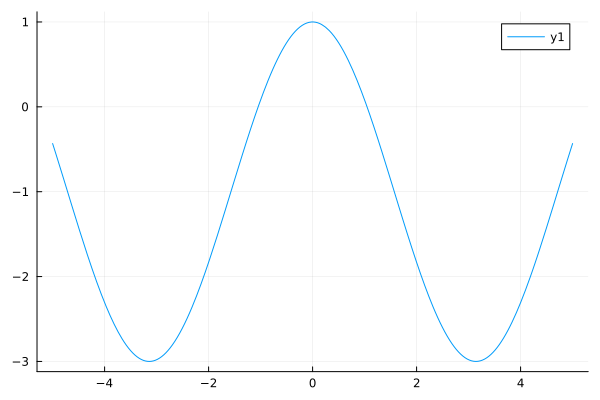

In [66]:
plot(f)

In [73]:
# Zeros de funções

a = 0
b = 2

# teste existência
if f(a)*f(b) >= 0
    println("Não há raiz no intervalo [$a,$b]")
else
    for i = 1:10
        x = (a+b)/2
        
        if f(a)*f(x) < 0
            b = x
        else
            a = x
        end
        println("Novo intervalo: [$a,$b]")
    end
    println("A raiz aproximada é x = $x")
end

Novo intervalo: [1.0,2]
Novo intervalo: [1.0,1.5]
Novo intervalo: [1.0,1.25]
Novo intervalo: [1.0,1.125]
Novo intervalo: [1.0,1.0625]
Novo intervalo: [1.03125,1.0625]
Novo intervalo: [1.046875,1.0625]
Novo intervalo: [1.046875,1.0546875]
Novo intervalo: [1.046875,1.05078125]
Novo intervalo: [1.046875,1.048828125]
A raiz aproximada é x = 1.048828125


In [74]:
f(x)

-0.0028255648066536354

<hr>

Considere o seguinte problema de otimização:

### Variáveis de Decisão:

\begin{equation}
x_1 \text{ e } x_2
\end{equation}

### Função objetivo:

\begin{equation}
    \text{Máx }f(x_1,x_2)=4000x_1+1000x_2
\end{equation}

### Restrições:

\begin{equation}
    \text{s.a.}\left \{ \begin{matrix}
    9x_1+x_2\leq 18\\
    3x_1+x_2\leq 12\\
    x_1\geq0,\;x_2\geq0
    \end{matrix}\right .
\end{equation}

In [13]:
# Importar os pacotes necessário para otimização
using HiGHS, JuMP

# Configurar as variáveis
modelo = Model(HiGHS.Optimizer)
@variable(modelo, x[1:2] >= 0)

c = [4000;1000]

# Estabelecer a função objetivo
@objective(modelo, Max, c'x)

A = [9 1;
    3 1]

b=[
    18,
    12]

# Estabelecer as restrições
@constraint(modelo, restr[i=1:2], A[i,:]'x <= b[i])

# Mostrar o modelo carregado
println(modelo, "\n")

# Otimizar o model
optimize!(modelo)

Max 4000 x[1] + 1000 x[2]
Subject to
 restr[1] : 9 x[1] + x[2] ≤ 18
 restr[2] : 3 x[1] + x[2] ≤ 12
 x[1] ≥ 0
 x[2] ≥ 0


Running HiGHS 1.7.2 (git hash: 5ce7a2753): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 9e+00]
  Cost   [1e+03, 4e+03]
  Bound  [0e+00, 0e+00]
  RHS    [1e+01, 2e+01]
Presolving model
2 rows, 2 cols, 4 nonzeros  0s
2 rows, 2 cols, 4 nonzeros  0s
Presolve : Reductions: rows 2(-0); columns 2(-0); elements 4(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -1.9999984617e+03 Ph1: 2(5); Du: 2(2000) 0s
          2     1.3000000000e+04 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 2
Objective value     :  1.3000000000e+04
HiGHS run time      :          0.00


In [9]:
# Imprimir os valores das variáveis
println(value.(x))

# Pular uma linha
println("\n")

# Imprimir o resultado ótimo da função objetivo:
print(objective_value(modelo))

[1.0, 9.0]


13000.0